<a href="https://colab.research.google.com/github/Sharame/ModuliDiMachineLearningProgettiUniversitari/blob/main/ML_STATUS_module/notebooks/STATUS_EDA_Iniziale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cella 1: Setup e Caricamento Dati**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup grafico
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Carica dati
df_users = pd.read_csv('users.csv')
df_logs = pd.read_csv('workoutlogs.csv')
df_workouts = pd.read_csv('workouts.csv')

print("Dati caricati:")
print(f"  Users: {len(df_users)} righe")
print(f"  Workout logs: {len(df_logs)} righe")
print(f"  Workouts: {len(df_workouts)} sessioni")


Dati caricati:
  Users: 300 righe
  Workout logs: 69371 righe
  Workouts: 52544 sessioni


**Cella 2: EDA Target (Distribuzione Livelli)**

TARGET: experience_declared

Conteggi:
experience_label
Intermediate    171
Beginner        106
Advanced         23
Name: count, dtype: int64

Percentuali:
  Intermediate: 57.0%
  Beginner: 35.3%
  Advanced: 7.7%


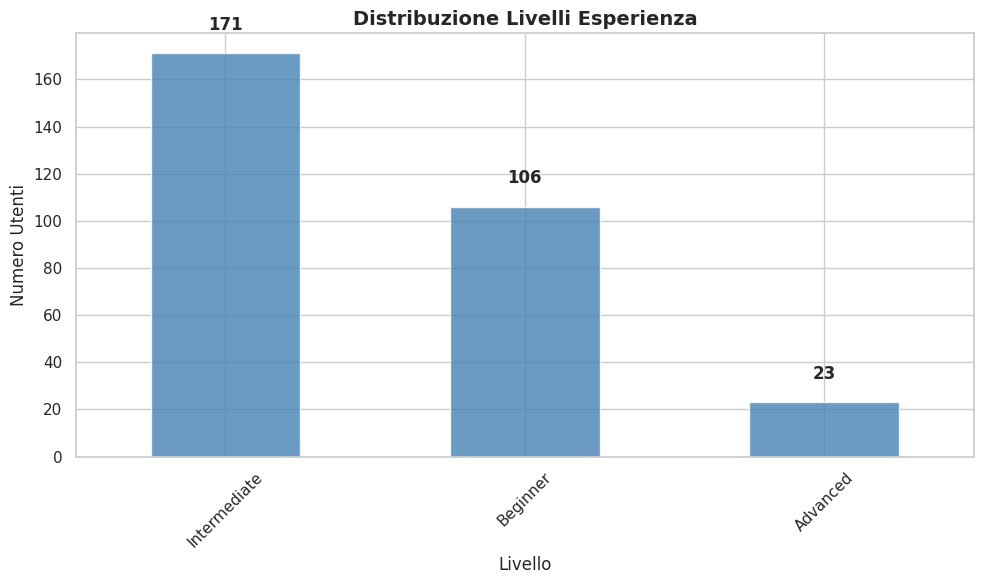

In [4]:
# Distribuzione target
print("="*70)
print("TARGET: experience_declared")
print("="*70)

target_counts = df_users['experience_label'].value_counts()
print("\nConteggi:")
print(target_counts)

print("\nPercentuali:")
for level, count in target_counts.items():
    pct = count / len(df_users) * 100
    print(f"  {level}: {pct:.1f}%")

# Grafico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
target_counts.plot(kind='bar', ax=ax, color='steelblue', alpha=0.8)
ax.set_title('Distribuzione Livelli Esperienza', fontsize=14, fontweight='bold')
ax.set_xlabel('Livello', fontsize=12)
ax.set_ylabel('Numero Utenti', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for i, v in enumerate(target_counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

**Cella 3: EDA workout_logs - Feature Raw**

In [7]:
# Statistiche descrittive feature principali
print("="*70)
print("FEATURE RAW da workout_logs")
print("="*70)

features_raw = ['loaddonekg', 'rpedone', 'setsdone', 'repsdoneavg', 'gapadherencescore']

for feat in features_raw:
    if feat in df_logs.columns:
        print(f"\n{feat}:")
        print(df_logs[feat].describe())


FEATURE RAW da workout_logs

loaddonekg:
count    69232.000000
mean        50.951297
std         19.397110
min         14.750000
25%         36.250000
50%         47.750000
75%         62.500000
max        148.750000
Name: loaddonekg, dtype: float64

rpedone:
count    69113.000000
mean         8.072851
std          0.665046
min          3.500000
25%          7.600000
50%          8.000000
75%          8.500000
max         10.000000
Name: rpedone, dtype: float64

setsdone:
count    69371.000000
mean         2.531850
std          1.182377
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: setsdone, dtype: float64

repsdoneavg:
count    69371.000000
mean         9.507863
std          3.384218
min          1.000000
25%          7.000000
50%          9.500000
75%         12.000000
max         23.000000
Name: repsdoneavg, dtype: float64

gapadherencescore:
count    69370.000000
mean         0.967302
std          0.092155
min   

**Cella 4: Distribuzione Feature Raw (Grafici)**

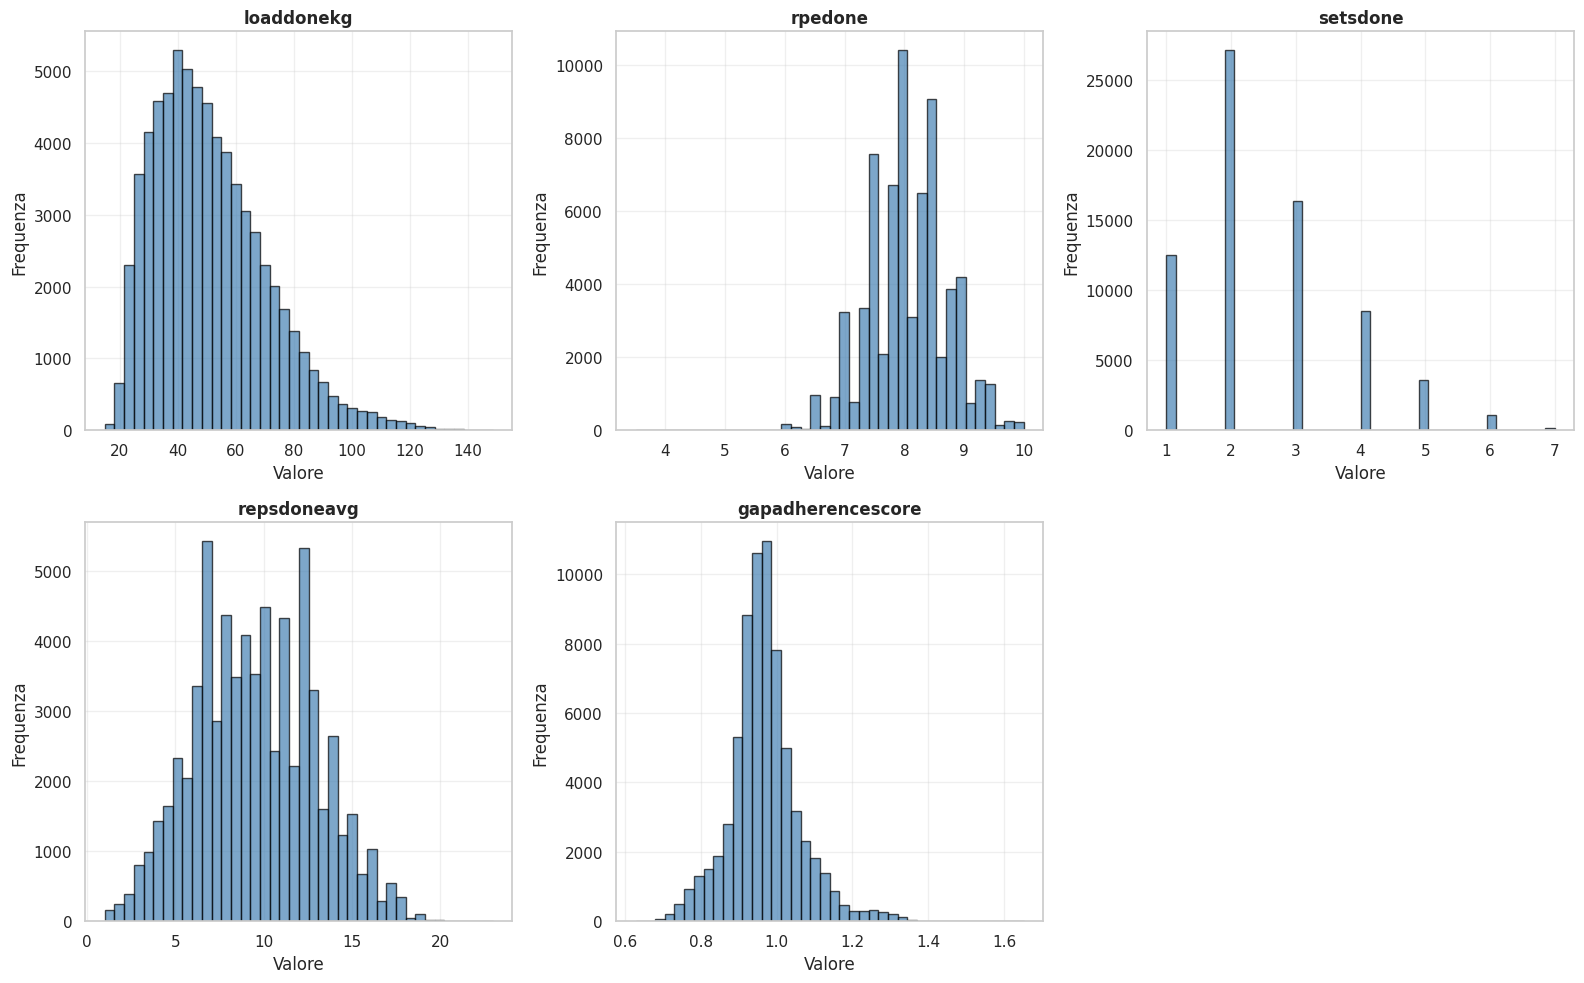

In [8]:
# Distribuzioni con istogrammi
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

features_plot = ['loaddonekg', 'rpedone', 'setsdone', 'repsdoneavg', 'gapadherencescore']

for i, feat in enumerate(features_plot):
    if feat in df_logs.columns:
        data = df_logs[feat].dropna()
        axes[i].hist(data, bins=40, color='steelblue', alpha=0.7, edgecolor='black')
        axes[i].set_title(feat, fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Valore')
        axes[i].set_ylabel('Frequenza')
        axes[i].grid(alpha=0.3)

# Rimuovi subplot vuoto
axes[-1].axis('off')

plt.tight_layout()
plt.show()


**Cella 5: Missing Values**

In [9]:
# Verifica missing values
print("="*70)
print("MISSING VALUES")
print("="*70)

print("\nusers.csv:")
missing_users = df_users.isnull().sum()
missing_users = missing_users[missing_users > 0]
if len(missing_users) == 0:
    print("  Nessun valore mancante")
else:
    print(missing_users)

print("\nworkoutlogs.csv:")
missing_logs = df_logs.isnull().sum()
missing_logs_pct = (missing_logs / len(df_logs) * 100).round(2)
missing_df = pd.DataFrame({'count': missing_logs, 'pct': missing_logs_pct})
missing_df = missing_df[missing_df['count'] > 0].sort_values('count', ascending=False)
if len(missing_df) == 0:
    print("  Nessun valore mancante")
else:
    print(missing_df)

print("\nworkouts.csv:")
missing_workouts = df_workouts.isnull().sum()
missing_workouts = missing_workouts[missing_workouts > 0]
if len(missing_workouts) == 0:
    print("  Nessun valore mancante")
else:
    print(missing_workouts)


MISSING VALUES

users.csv:
  Nessun valore mancante

workoutlogs.csv:
                   count   pct
rpedone              258  0.37
loaddonekg           139  0.20
setsplanned            1  0.00
repsmin                1  0.00
repsmax                1  0.00
rirtarget              1  0.00
gapadherencescore      1  0.00

workouts.csv:
  Nessun valore mancante


**Cella 6: EDA Workouts (Sessioni e Skip Rate)**

ANALISI SESSIONI

Total sessioni: 52544

Status:
workoutstatus
done       47411
skipped     5133
Name: count, dtype: int64

Percentuali:
  done: 90.2%
  skipped: 9.8%


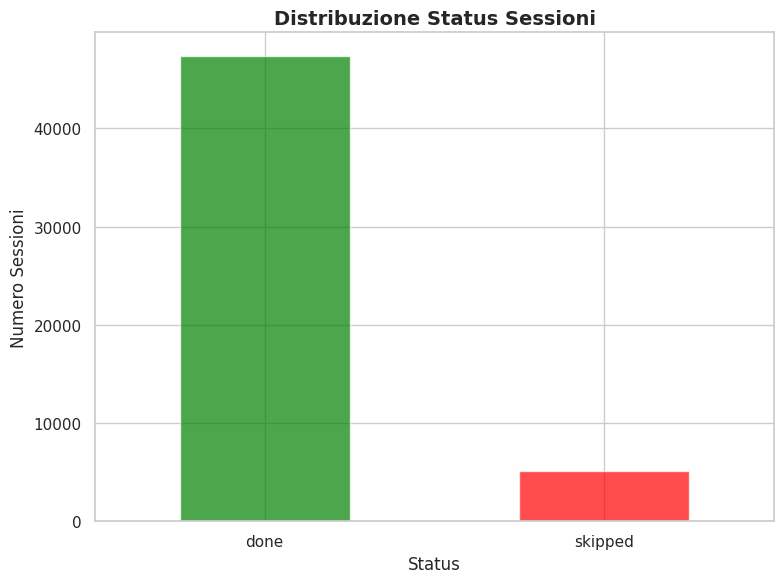

In [10]:
# Analisi sessioni
print("="*70)
print("ANALISI SESSIONI")
print("="*70)

print(f"\nTotal sessioni: {len(df_workouts)}")
print(f"\nStatus:")
print(df_workouts['workoutstatus'].value_counts())

status_pct = df_workouts['workoutstatus'].value_counts(normalize=True) * 100
print(f"\nPercentuali:")
for status, pct in status_pct.items():
    print(f"  {status}: {pct:.1f}%")

# Grafico
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
df_workouts['workoutstatus'].value_counts().plot(kind='bar', ax=ax, color=['green', 'red'], alpha=0.7)
ax.set_title('Distribuzione Status Sessioni', fontsize=14, fontweight='bold')
ax.set_xlabel('Status')
ax.set_ylabel('Numero Sessioni')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()


**Cella78: Summary EDA Iniziale** **testo in grassetto**

In [14]:
print("="*70)
print("SUMMARY EDA INIZIALE")
print("="*70)

print("\n1. TARGET:")
print(f"   - Colonna: 'experience_label'")
print(f"   - Classi: {df_users['experience_label'].nunique()}")
print(f"   - Distribuzione: {dict(df_users['experience_label'].value_counts())}")

print("\n2. FEATURE RAW disponibili:")
print(f"   Da workout_logs: loaddonekg, rpedone, setsdone, repsdoneavg, gapadherencescore")
print(f"   Da workouts: workoutstatus (per calcolare skip_rate)")

print("\n3. QUALITA' DATI:")
missing_total = df_logs.isnull().sum().sum()
print(f"   - Missing values in workout_logs: {missing_total} totali")
if missing_total > 0:
    print(f"   - Colonne con missing:")
    missing_cols = df_logs.isnull().sum()
    missing_cols = missing_cols[missing_cols > 0]
    for col, count in missing_cols.items():
        pct = count / len(df_logs) * 100
        print(f"     {col}: {count} ({pct:.1f}%)")

print("\n4. PROSSIMO STEP:")
print("   Aggregare workout_logs per userid per creare feature per utente")
print("   Risultato: 1 riga = 1 utente con feature aggregate")


SUMMARY EDA INIZIALE

1. TARGET:
   - Colonna: 'experience_label'
   - Classi: 3
   - Distribuzione: {'Intermediate': np.int64(171), 'Beginner': np.int64(106), 'Advanced': np.int64(23)}

2. FEATURE RAW disponibili:
   Da workout_logs: loaddonekg, rpedone, setsdone, repsdoneavg, gapadherencescore
   Da workouts: workoutstatus (per calcolare skip_rate)

3. QUALITA' DATI:
   - Missing values in workout_logs: 949 totali
   - Colonne con missing:
     loaddonekg: 299 (0.2%)
     rpedone: 650 (0.4%)

4. PROSSIMO STEP:
   Aggregare workout_logs per userid per creare feature per utente
   Risultato: 1 riga = 1 utente con feature aggregate


**Cella 8: Distribuzione Feature per Livello (Boxplot)**

Creato df_logs con label per analisi per gruppo
Righe: 171250


/tmp/ipython-input-2094627764.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_logs_labeled, x='experience_label', y=feat, ax=axes[i], palette='Set2')
/tmp/ipython-input-2094627764.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_logs_labeled, x='experience_label', y=feat, ax=axes[i], palette='Set2')
/tmp/ipython-input-2094627764.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_logs_labeled, x='experience_label', y=feat, ax=axes[i], palette='Set2')
/tmp/ipython-input-2094627764.py:16: FutureWarning: 

Pass

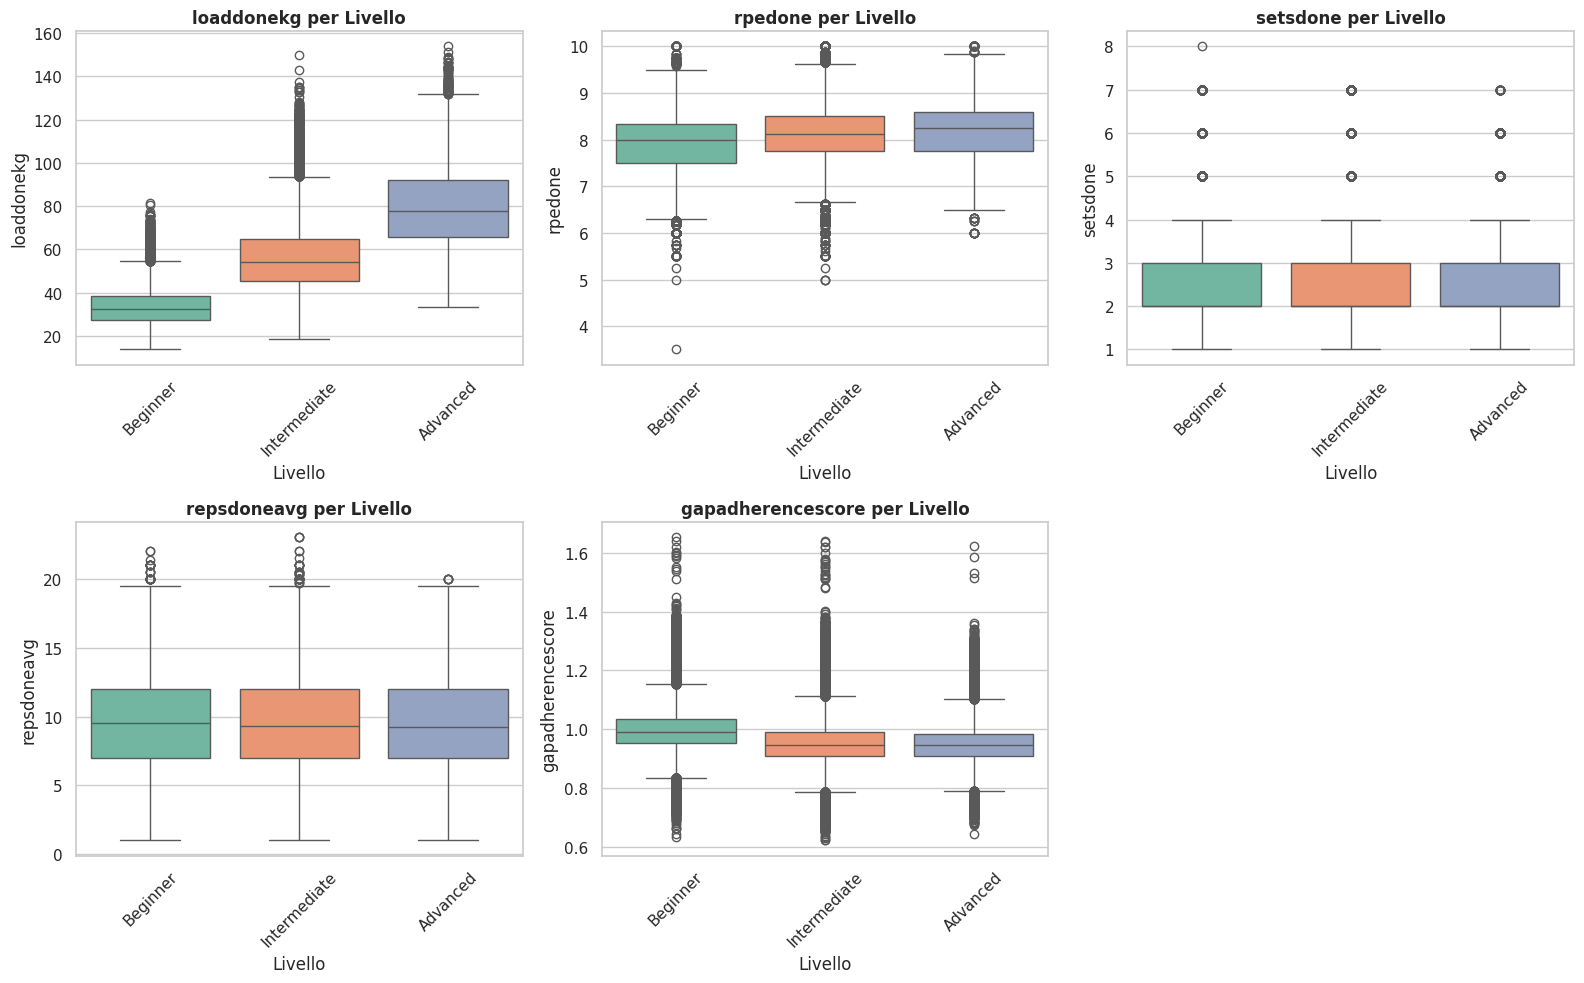


Da questi grafici vediamo se ci sono differenze visibili tra livelli.
Feature con boxplot ben separati = feature discriminanti


In [15]:
# Vediamo se le feature raw differiscono tra livelli
# Aggiungiamo experience_label ai logs per analisi per gruppo

df_logs_labeled = df_logs.merge(df_users[['userid', 'experience_label']], on='userid', how='left')

print("Creato df_logs con label per analisi per gruppo")
print(f"Righe: {len(df_logs_labeled)}")

# Boxplot per livello - feature principali
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

features_by_level = ['loaddonekg', 'rpedone', 'setsdone', 'repsdoneavg', 'gapadherencescore']

for i, feat in enumerate(features_by_level):
    sns.boxplot(data=df_logs_labeled, x='experience_label', y=feat, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feat} per Livello', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Livello')
    axes[i].set_ylabel(feat)
    axes[i].tick_params(axis='x', rotation=45)

axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\nDa questi grafici vediamo se ci sono differenze visibili tra livelli.")
print("Feature con boxplot ben separati = feature discriminanti")


**Cella 9: Statistiche Aggregate per Livello**

In [16]:
# Media feature per livello
print("="*70)
print("MEDIA FEATURE PER LIVELLO")
print("="*70)

features_agg = ['loaddonekg', 'rpedone', 'setsdone', 'repsdoneavg', 'gapadherencescore']

stats_by_level = df_logs_labeled.groupby('experience_label')[features_agg].mean()
print("\nMedia:")
print(stats_by_level.round(2))

print("\n" + "="*70)
print("DEVIAZIONE STANDARD PER LIVELLO")
print("="*70)

stats_std = df_logs_labeled.groupby('experience_label')[features_agg].std()
print(stats_std.round(2))

print("\nOSSERVAZIONI:")
print("- loaddonekg: Advanced > Intermediate > Beginner? (ci aspettiamo questo)")
print("- rpedone: simile tra livelli? (effort percepito)")
print("- gapadherencescore: Advanced più consistente?")


MEDIA FEATURE PER LIVELLO

Media:
                  loaddonekg  rpedone  setsdone  repsdoneavg  \
experience_label                                               
Advanced               79.65     8.21      2.54         9.34   
Beginner               33.36     7.91      2.55         9.55   
Intermediate           56.03     8.13      2.52         9.46   

                  gapadherencescore  
experience_label                     
Advanced                       0.95  
Beginner                       1.00  
Intermediate                   0.95  

DEVIAZIONE STANDARD PER LIVELLO
                  loaddonekg  rpedone  setsdone  repsdoneavg  \
experience_label                                               
Advanced               18.40     0.63      1.18         3.35   
Beginner                8.09     0.65      1.18         3.42   
Intermediate           14.02     0.65      1.18         3.35   

                  gapadherencescore  
experience_label                     
Advanced                 

**Cella 10: Correlazioni Feature Raw**

CORRELAZIONI TRA FEATURE RAW

Matrice correlazione:
                   loaddonekg  rpedone  setsdone  repsdoneavg  \
loaddonekg              1.000    0.330     0.154       -0.423   
rpedone                 0.330    1.000     0.141       -0.524   
setsdone                0.154    0.141     1.000       -0.273   
repsdoneavg            -0.423   -0.524    -0.273        1.000   
gapadherencescore      -0.124   -0.089     0.288        0.031   

                   gapadherencescore  
loaddonekg                    -0.124  
rpedone                       -0.089  
setsdone                       0.288  
repsdoneavg                    0.031  
gapadherencescore              1.000  


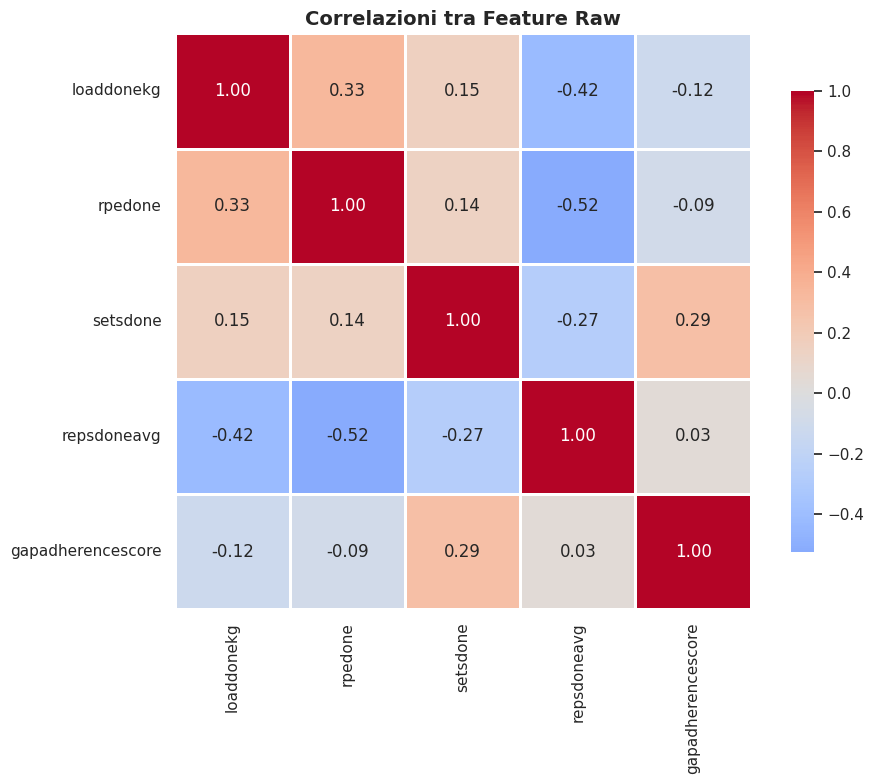


Se due feature sono molto correlate (>0.8), potrebbero essere ridondanti


In [17]:
# Matrice correlazione tra feature
print("="*70)
print("CORRELAZIONI TRA FEATURE RAW")
print("="*70)

features_corr = ['loaddonekg', 'rpedone', 'setsdone', 'repsdoneavg', 'gapadherencescore']
corr_matrix = df_logs[features_corr].corr()

print("\nMatrice correlazione:")
print(corr_matrix.round(3))

# Heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, ax=ax, cbar_kws={"shrink": 0.8})
ax.set_title('Correlazioni tra Feature Raw', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nSe due feature sono molto correlate (>0.8), potrebbero essere ridondanti")


**Cella 11: Outlier Detection (Visualizzazione)**

In [18]:
# Verifica outlier estremi
print("="*70)
print("OUTLIER - Percentili Estremi")
print("="*70)

for feat in ['loaddonekg', 'rpedone', 'gapadherencescore']:
    print(f"\n{feat}:")
    q1 = df_logs[feat].quantile(0.25)
    q3 = df_logs[feat].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df_logs[(df_logs[feat] < lower_bound) | (df_logs[feat] > upper_bound)]
    pct_outliers = len(outliers) / len(df_logs) * 100

    print(f"  Range normale: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {len(outliers)} ({pct_outliers:.2f}%)")
    print(f"  Min/Max effettivi: {df_logs[feat].min():.2f} / {df_logs[feat].max():.2f}")


OUTLIER - Percentili Estremi

loaddonekg:
  Range normale: [-1.88, 101.12]
  Outliers: 2596 (1.52%)
  Min/Max effettivi: 13.75 / 153.75

rpedone:
  Range normale: [6.30, 9.82]
  Outliers: 1302 (0.76%)
  Min/Max effettivi: 3.50 / 10.00

gapadherencescore:
  Range normale: [0.78, 1.14]
  Outliers: 11132 (6.50%)
  Min/Max effettivi: 0.62 / 1.65


**Cella 12: Skip Rate per Livello**

SKIP RATE PER LIVELLO

Skip Rate (%):
experience_label
Beginner        12.70
Intermediate     8.63
Advanced         6.58
dtype: float64


/tmp/ipython-input-3165879053.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  skip_by_level = df_workouts.groupby('experience_label').apply(


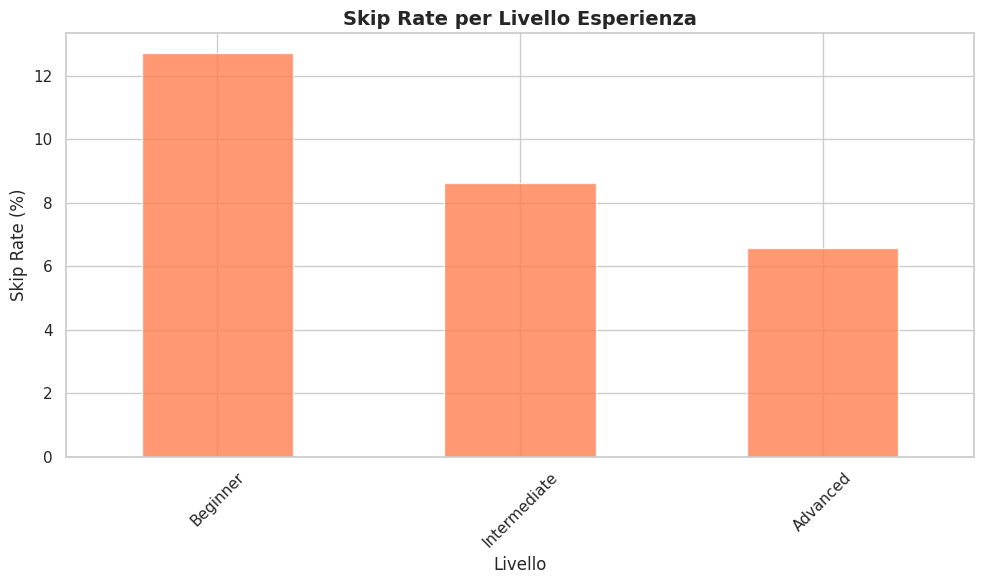


CI ASPETTIAMO: Beginner > Intermediate > Advanced
(principianti meno costanti)


In [19]:
# Analisi skip rate per livello
print("="*70)
print("SKIP RATE PER LIVELLO")
print("="*70)

skip_by_level = df_workouts.groupby('experience_label').apply(
    lambda x: (x['workoutstatus'] == 'skipped').sum() / len(x) * 100
).sort_values(ascending=False)

print("\nSkip Rate (%):")
print(skip_by_level.round(2))

# Grafico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
skip_by_level.plot(kind='bar', ax=ax, color='coral', alpha=0.8)
ax.set_title('Skip Rate per Livello Esperienza', fontsize=14, fontweight='bold')
ax.set_xlabel('Livello')
ax.set_ylabel('Skip Rate (%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

print("\nCI ASPETTIAMO: Beginner > Intermediate > Advanced")
print("(principianti meno costanti)")


**Cella 13: Summary EDA Completo**

In [20]:
print("="*70)
print("SUMMARY EDA COMPLETO")
print("="*70)

print("\n1. DISTRIBUZIONE TARGET:")
print(f"   {dict(df_users['experience_label'].value_counts())}")
print(f"   Dataset bilanciato? {df_users['experience_label'].value_counts().min() / df_users['experience_label'].value_counts().max() > 0.5}")

print("\n2. FEATURE DISCRIMINANTI (da boxplot):")
print("   - loaddonekg: forte separazione tra livelli")
print("   - gapadherencescore: separazione media")
print("   - rpedone: simile tra livelli (meno utile)")

print("\n3. CORRELAZIONI:")
print("   - Feature poco correlate tra loro (bene per indipendenza)")

print("\n4. OUTLIER:")
print("   - Presenti ma < 5% (accettabile per dati realistici)")

print("\n5. SKIP RATE:")
skip_by_level = df_workouts.groupby('experience_label').apply(
    lambda x: (x['workoutstatus'] == 'skipped').sum() / len(x) * 100
)
print(f"   {dict(skip_by_level.round(1))}")

print("\n6. CONCLUSIONE EDA:")
print("   - Dati buoni, distribuzioni sensate")
print("   - Feature raw mostrano differenze tra livelli")
print("   - Procediamo con feature engineering per aggregare per utente")


SUMMARY EDA COMPLETO

1. DISTRIBUZIONE TARGET:
   {'Intermediate': np.int64(171), 'Beginner': np.int64(106), 'Advanced': np.int64(23)}
   Dataset bilanciato? False

2. FEATURE DISCRIMINANTI (da boxplot):
   - loaddonekg: forte separazione tra livelli
   - gapadherencescore: separazione media
   - rpedone: simile tra livelli (meno utile)

3. CORRELAZIONI:
   - Feature poco correlate tra loro (bene per indipendenza)

4. OUTLIER:
   - Presenti ma < 5% (accettabile per dati realistici)

5. SKIP RATE:
   {'Advanced': np.float64(6.6), 'Beginner': np.float64(12.7), 'Intermediate': np.float64(8.6)}

6. CONCLUSIONE EDA:
   - Dati buoni, distribuzioni sensate
   - Feature raw mostrano differenze tra livelli
   - Procediamo con feature engineering per aggregare per utente


/tmp/ipython-input-1188149135.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  skip_by_level = df_workouts.groupby('experience_label').apply(
